In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T02:04:16.288224+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
teeplot: 1.4.2
seaborn: 0.13.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8358230590820312e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.47670674324035645}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.004143476486206055}
!!! {"init_...": 0.0007290840148925781}
!!! {"ete3Tree": 0.3832085132598877}
!!! {"GenomeTree_hierarchical": 0.30621933937072754}
!!! {"mutateBranchETEhierarchy": 0.09041047096252441}
!!! {"write_genome_short": 0.04979562759399414}


  4%|▍         | 8/193 [00:03<00:54,  3.42it/s]

!!! {"writeGenomeNoIndels": 0.1736621856689453}
!!! {"pl.DataFrame": 0.04440593719482422}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0584716796875}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017581462860107422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032944679260253906}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012922286987304688}
!!! {"init_...": 0.0004875659942626953}
!!! {"ete3Tree": 7.772445678710938e-05}
!!! {"GenomeTree_hierarchical": 0.002162456512451172}
!!! {"mutateBranchETEhierarchy": 1.4066696166992188e-05}
!!! {"write_genome_short": 6.961822509765625e

  8%|▊         | 15/193 [00:03<00:24,  7.33it/s]

!!! {"phastSimRun": 9.989738464355469e-05}
!!! {"init_...": 0.0005896091461181641}
!!! {"ete3Tree": 0.001489877700805664}
!!! {"GenomeTree_hierarchical": 0.001984119415283203}
!!! {"mutateBranchETEhierarchy": 0.00013208389282226562}
!!! {"write_genome_short": 0.00015854835510253906}
!!! {"writeGenomeNoIndels": 0.00024056434631347656}
!!! {"pl.DataFrame": 0.0001246929168701172}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006819486618041992}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000232696533203125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032172203063964844}
enter log_context_duration for _d

 13%|█▎        | 26/193 [00:03<00:11, 14.63it/s]

!!! {"phastSimRun": 0.00010800361633300781}
!!! {"init_...": 0.0005731582641601562}
!!! {"ete3Tree": 0.020214319229125977}
!!! {"GenomeTree_hierarchical": 0.002102375030517578}
!!! {"mutateBranchETEhierarchy": 0.005021333694458008}
!!! {"write_genome_short": 0.0024423599243164062}
!!! {"writeGenomeNoIndels": 0.007737636566162109}
!!! {"pl.DataFrame": 0.0014984607696533203}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04197812080383301}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009686946868896484}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 4.410743713378906e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003229379653930664}
enter log_context_duration for _do_run_

 21%|██        | 40/193 [00:03<00:05, 27.08it/s]

!!! {"phastSimRun": 0.00010061264038085938}
!!! {"init_...": 0.0005297660827636719}
!!! {"ete3Tree": 0.0004258155822753906}
!!! {"GenomeTree_hierarchical": 0.0021049976348876953}
!!! {"mutateBranchETEhierarchy": 8.749961853027344e-05}
!!! {"write_genome_short": 0.00010657310485839844}
!!! {"writeGenomeNoIndels": 0.00014281272888183594}
!!! {"pl.DataFrame": 0.00011086463928222656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005537748336791992}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019431114196777344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031015872955322266}
enter log_context_duration fo

 24%|██▍       | 46/193 [00:03<00:04, 30.20it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008515357971191406}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011134147644042969}
!!! {"init_...": 0.0004296302795410156}
!!! {"ete3Tree": 0.020774126052856445}
!!! {"GenomeTree_hierarchical": 0.0027189254760742188}
!!! {"mutateBranchETEhierarchy": 0.004685878753662109}
!!! {"write_genome_short": 0.002384662628173828}
!!! {"writeGenomeNoIndels": 0.00852203369140625}
!!! {"pl.DataFrame": 0.0016188621520996094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.042957305908203125}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00100517

 31%|███       | 60/193 [00:04<00:03, 42.30it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.7179718017578125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034461021423339844}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011038780212402344}
!!! {"init_...": 0.00043392181396484375}
!!! {"ete3Tree": 7.295608520507812e-05}
!!! {"GenomeTree_hierarchical": 0.0028846263885498047}
!!! {"mutateBranchETEhierarchy": 1.1920928955078125e-05}
!!! {"write_genome_short": 6.532669067382812e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 8.0108642578125e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005377531051635742}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002

 38%|███▊      | 74/193 [00:04<00:02, 50.59it/s]

!!! {"phastSimRun": 0.00010180473327636719}
!!! {"init_...": 0.0005629062652587891}
!!! {"ete3Tree": 5.793571472167969e-05}
!!! {"GenomeTree_hierarchical": 0.0020904541015625}
!!! {"mutateBranchETEhierarchy": 1.0013580322265625e-05}
!!! {"write_genome_short": 6.508827209472656e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 6.914138793945312e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0051577091217041016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00017952919006347656}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=16, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003124237060546875}
enter log_context_duration for _d

 41%|████▏     | 80/193 [00:04<00:02, 49.43it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.86102294921875e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034847259521484375}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010442733764648438}
!!! {"init_...": 0.0004372596740722656}
!!! {"ete3Tree": 6.0558319091796875e-05}
!!! {"GenomeTree_hierarchical": 0.0021860599517822266}
!!! {"mutateBranchETEhierarchy": 1.0013580322265625e-05}
!!! {"write_genome_short": 7.557868957519531e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.271766662597656e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004593372344970703}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000223

 45%|████▍     | 86/193 [00:04<00:02, 42.26it/s]

!!! {"writeGenomeNoIndels": 0.008521556854248047}
!!! {"pl.DataFrame": 0.001611948013305664}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04190230369567871}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009121894836425781}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.1696090698242188e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003138303756713867}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001277923583984375}
!!! {"init_...": 0.0004494190216064453}
!!! {"ete3Tree": 0.0001857280731201172}
!!! {"GenomeTree_hierarchical": 0.002135038375854492}
!!! {"mutateBranchETEhierarchy": 3.6716461181640625e-05}
!!! {"write_genome_short": 9.655952453

 51%|█████     | 98/193 [00:04<00:02, 45.67it/s]

!!! {"phastSimRun": 0.00016164779663085938}
!!! {"init_...": 0.0006051063537597656}
!!! {"ete3Tree": 9.489059448242188e-05}
!!! {"GenomeTree_hierarchical": 0.0021800994873046875}
!!! {"mutateBranchETEhierarchy": 1.7404556274414062e-05}
!!! {"write_genome_short": 7.414817810058594e-05}
!!! {"writeGenomeNoIndels": 1.5974044799804688e-05}
!!! {"pl.DataFrame": 9.751319885253906e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005566120147705078}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000240325927734375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031790733337402344}
enter log_context_duration for 

 56%|█████▋    | 109/193 [00:05<00:01, 46.48it/s]

!!! {"phastSimRun": 0.00013947486877441406}
!!! {"init_...": 0.0006079673767089844}
!!! {"ete3Tree": 0.00013947486877441406}
!!! {"GenomeTree_hierarchical": 0.002785921096801758}
!!! {"mutateBranchETEhierarchy": 2.6226043701171875e-05}
!!! {"write_genome_short": 8.630752563476562e-05}
!!! {"writeGenomeNoIndels": 3.528594970703125e-05}
!!! {"pl.DataFrame": 9.751319885253906e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006112575531005859}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002837181091308594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=8, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031681060791015625}
enter log_context_duration for 

 63%|██████▎   | 122/193 [00:05<00:01, 51.80it/s]

!!! {"phastSimRun": 0.00010275840759277344}
!!! {"init_...": 0.0005831718444824219}
!!! {"ete3Tree": 8.416175842285156e-05}
!!! {"GenomeTree_hierarchical": 0.002099752426147461}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 7.009506225585938e-05}
!!! {"writeGenomeNoIndels": 1.33514404296875e-05}
!!! {"pl.DataFrame": 6.985664367675781e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005528926849365234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019407272338867188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.9073486328125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003096342086791992}
enter log_context_duration for _do_ru

 70%|██████▉   | 135/193 [00:05<00:01, 56.21it/s]

!!! {"write_genome_short": 0.001062631607055664}
!!! {"writeGenomeNoIndels": 0.0019779205322265625}
!!! {"pl.DataFrame": 0.0004246234893798828}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.014454841613769531}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0004096031188964844}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.5974044799804688e-05}
len(phylogeny_df)=21, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031092166900634766}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001010894775390625}
!!! {"init_...": 0.000438690185546875}
!!! {"ete3Tree": 0.00017595291137695312}
!!! {"GenomeTree_hierarchical": 0.002122163772583008}
!!! {"mutateBranchETEhierarchy": 3.3855438

 74%|███████▎  | 142/193 [00:05<00:00, 58.49it/s]

!!! {"write_genome_short": 0.0005342960357666016}
!!! {"writeGenomeNoIndels": 1.0728836059570312e-05}
!!! {"pl.DataFrame": 6.842613220214844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00506138801574707}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00018906593322753906}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=22, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031936168670654297}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 9.965896606445312e-05}
!!! {"init_...": 0.00043129920959472656}
!!! {"ete3Tree": 0.00018405914306640625}
!!! {"GenomeTree_hierarchical": 0.0021772384643554688}
!!! {"mutateBranchETEhierarchy": 3.957

 77%|███████▋  | 148/193 [00:05<00:01, 44.38it/s]

!!! {"write_genome_short": 0.004143238067626953}
!!! {"writeGenomeNoIndels": 0.01125645637512207}
!!! {"pl.DataFrame": 0.002160310745239258}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05542922019958496}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011494159698486328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 3.3855438232421875e-05}
len(phylogeny_df)=4147, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.009023904800415039}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012111663818359375}
!!! {"init_...": 0.000446319580078125}
!!! {"ete3Tree": 0.023334264755249023}
!!! {"GenomeTree_hierarchical": 0.002076387405395508}
!!! {"mutateBranchETEhierarchy": 0.00591826438

 80%|████████  | 155/193 [00:06<00:00, 45.53it/s]

!!! {"ete3Tree": 0.014686107635498047}
!!! {"GenomeTree_hierarchical": 0.002687215805053711}
!!! {"mutateBranchETEhierarchy": 0.0033266544342041016}
!!! {"write_genome_short": 0.0019571781158447266}
!!! {"writeGenomeNoIndels": 0.0057184696197509766}
!!! {"pl.DataFrame": 0.0010864734649658203}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.03159141540527344}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006873607635498047}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030918121337890625}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011277198791503906}
!!! {"init_...": 0.00045967

 83%|████████▎ | 160/193 [00:07<00:02, 11.36it/s]

!!! {"ete3Tree": 0.8070359230041504}
!!! {"GenomeTree_hierarchical": 0.0021665096282958984}
!!! {"mutateBranchETEhierarchy": 0.04389786720275879}
!!! {"write_genome_short": 0.022002696990966797}
!!! {"writeGenomeNoIndels": 0.07458806037902832}
!!! {"pl.DataFrame": 0.013828516006469727}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.9667758941650391}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005969524383544922}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003230571746826172}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001366138458251953}
!!! {"init_...": 0.0004913806915283203

 85%|████████▌ | 165/193 [00:07<00:01, 14.07it/s]

!!! {"phastSimRun": 0.0001010894775390625}
!!! {"init_...": 0.0005748271942138672}
!!! {"ete3Tree": 5.8650970458984375e-05}
!!! {"GenomeTree_hierarchical": 0.0027196407318115234}
!!! {"mutateBranchETEhierarchy": 1.0013580322265625e-05}
!!! {"write_genome_short": 7.176399230957031e-05}
!!! {"writeGenomeNoIndels": 6.198883056640625e-06}
!!! {"pl.DataFrame": 7.033348083496094e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005723714828491211}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020360946655273438}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=625, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004098415374755859}
enter log_context_duration fo

 92%|█████████▏| 177/193 [00:08<00:00, 20.60it/s]

!!! {"ete3Tree": 0.06352806091308594}
!!! {"GenomeTree_hierarchical": 0.002045869827270508}
!!! {"mutateBranchETEhierarchy": 0.015575885772705078}
!!! {"write_genome_short": 0.0076198577880859375}
!!! {"writeGenomeNoIndels": 0.025401830673217773}
!!! {"pl.DataFrame": 0.0048940181732177734}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12178468704223633}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002402782440185547}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031735897064208984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013256072998046875}
!!! {"init_...": 0.000460386276

 94%|█████████▍| 182/193 [00:08<00:00, 24.30it/s]

!!! {"phastSimRun": 0.00010085105895996094}
!!! {"init_...": 0.0005395412445068359}
!!! {"ete3Tree": 0.008839130401611328}
!!! {"GenomeTree_hierarchical": 0.0025997161865234375}
!!! {"mutateBranchETEhierarchy": 0.002110719680786133}
!!! {"write_genome_short": 0.0011584758758544922}
!!! {"writeGenomeNoIndels": 0.0036530494689941406}
!!! {"pl.DataFrame": 0.0008134841918945312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.02229022979736328}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005908012390136719}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031147003173828125}
enter log_context_duration for _do_

100%|██████████| 193/193 [00:08<00:00, 22.97it/s]

!!! {"pl.DataFrame": 0.0026221275329589844}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0600123405456543}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001630544662475586}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003168344497680664}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013446807861328125}
!!! {"init_...": 0.00048279762268066406}
!!! {"ete3Tree": 7.700920104980469e-05}
!!! {"GenomeTree_hierarchical": 0.0022258758544921875}
!!! {"mutateBranchETEhierarchy": 1.3113021850585938e-05}
!!! {"write_genome_short": 7.05718994140625e-05}
!!! {"writeGenomeNoIndels": 6.91413879

exit log_context_duration for extract variant
!!! {"extract variant": 0.0952143669128418}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.25530266761779785}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03307294845581055}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002650737762451172}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03326869010925293}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0021712779998779297}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002343416213989258}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.032972097396850586}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0027539730072021484}
enter log_context_duration for se

 43%|████▎     | 3/7 [00:00<00:00, 23.28it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03333759307861328}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003621816635131836}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0022492408752441406}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033147335052490234}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0034265518188476562}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.002321958541870117}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mis

100%|██████████| 7/7 [00:00<00:00, 24.24it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03391599655151367}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0036895275115966797}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014994144439697266}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020333290100097656}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003000020980834961}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.37129664421081543}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.27559638023376465}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 159.91it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 28.86629867553711}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 599.43it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 136.59718370437622}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06037449836730957}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 199.34075355529785}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.008905172348022461}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003407001495361328}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.00040411949157714844}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004220008850097656}
ancestral


100%|██████████| 368/368 [00:00<00:00, 284831.86it/s]

process mutations:   0%|          | 1/368 [00:00<01:13,  4.97it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:17<13:28,  2.25s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.4s



process mutations:  13%|█▎        | 48/368 [01:07<07:18,  1.37s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.2min



process mutations:  24%|██▍       | 88/368 [02:00<06:15,  1.34s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.1min



process mutations:  35%|███▍      | 128/368 [02:52<05:17,  1.32s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.0min



process mutations:  46%|████▌     | 168/368 [03:43<04:21,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.9min



process mutations:  57%|█████▋    | 208/368 [04:35<03:28,  1.30s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.8min



process mutations:  67%|██████▋   | 248/368 [05:27<02:36,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  5.7min



process mutations:  78%|███████▊  | 288/368 [06:20<01:44,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  6.6min



process mutations:  89%|████████▉ | 328/368 [07:13<00:52,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.4min



process mutations: 100%|██████████| 368/368 [08:04<00:00,  1.32s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.1min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.2min finished


process replicate: 100%|██████████| 1/1 [11:40<00:00, 700.53s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.10098910331726074}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 112
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '2cb0691b-c60a-8d9d-b45b-adfd94032a49', '2cb0691b-c60a-8d9d-b45b-adfd94032a49', '2cb0691b-c60a-8d9d-b45b-adfd94
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


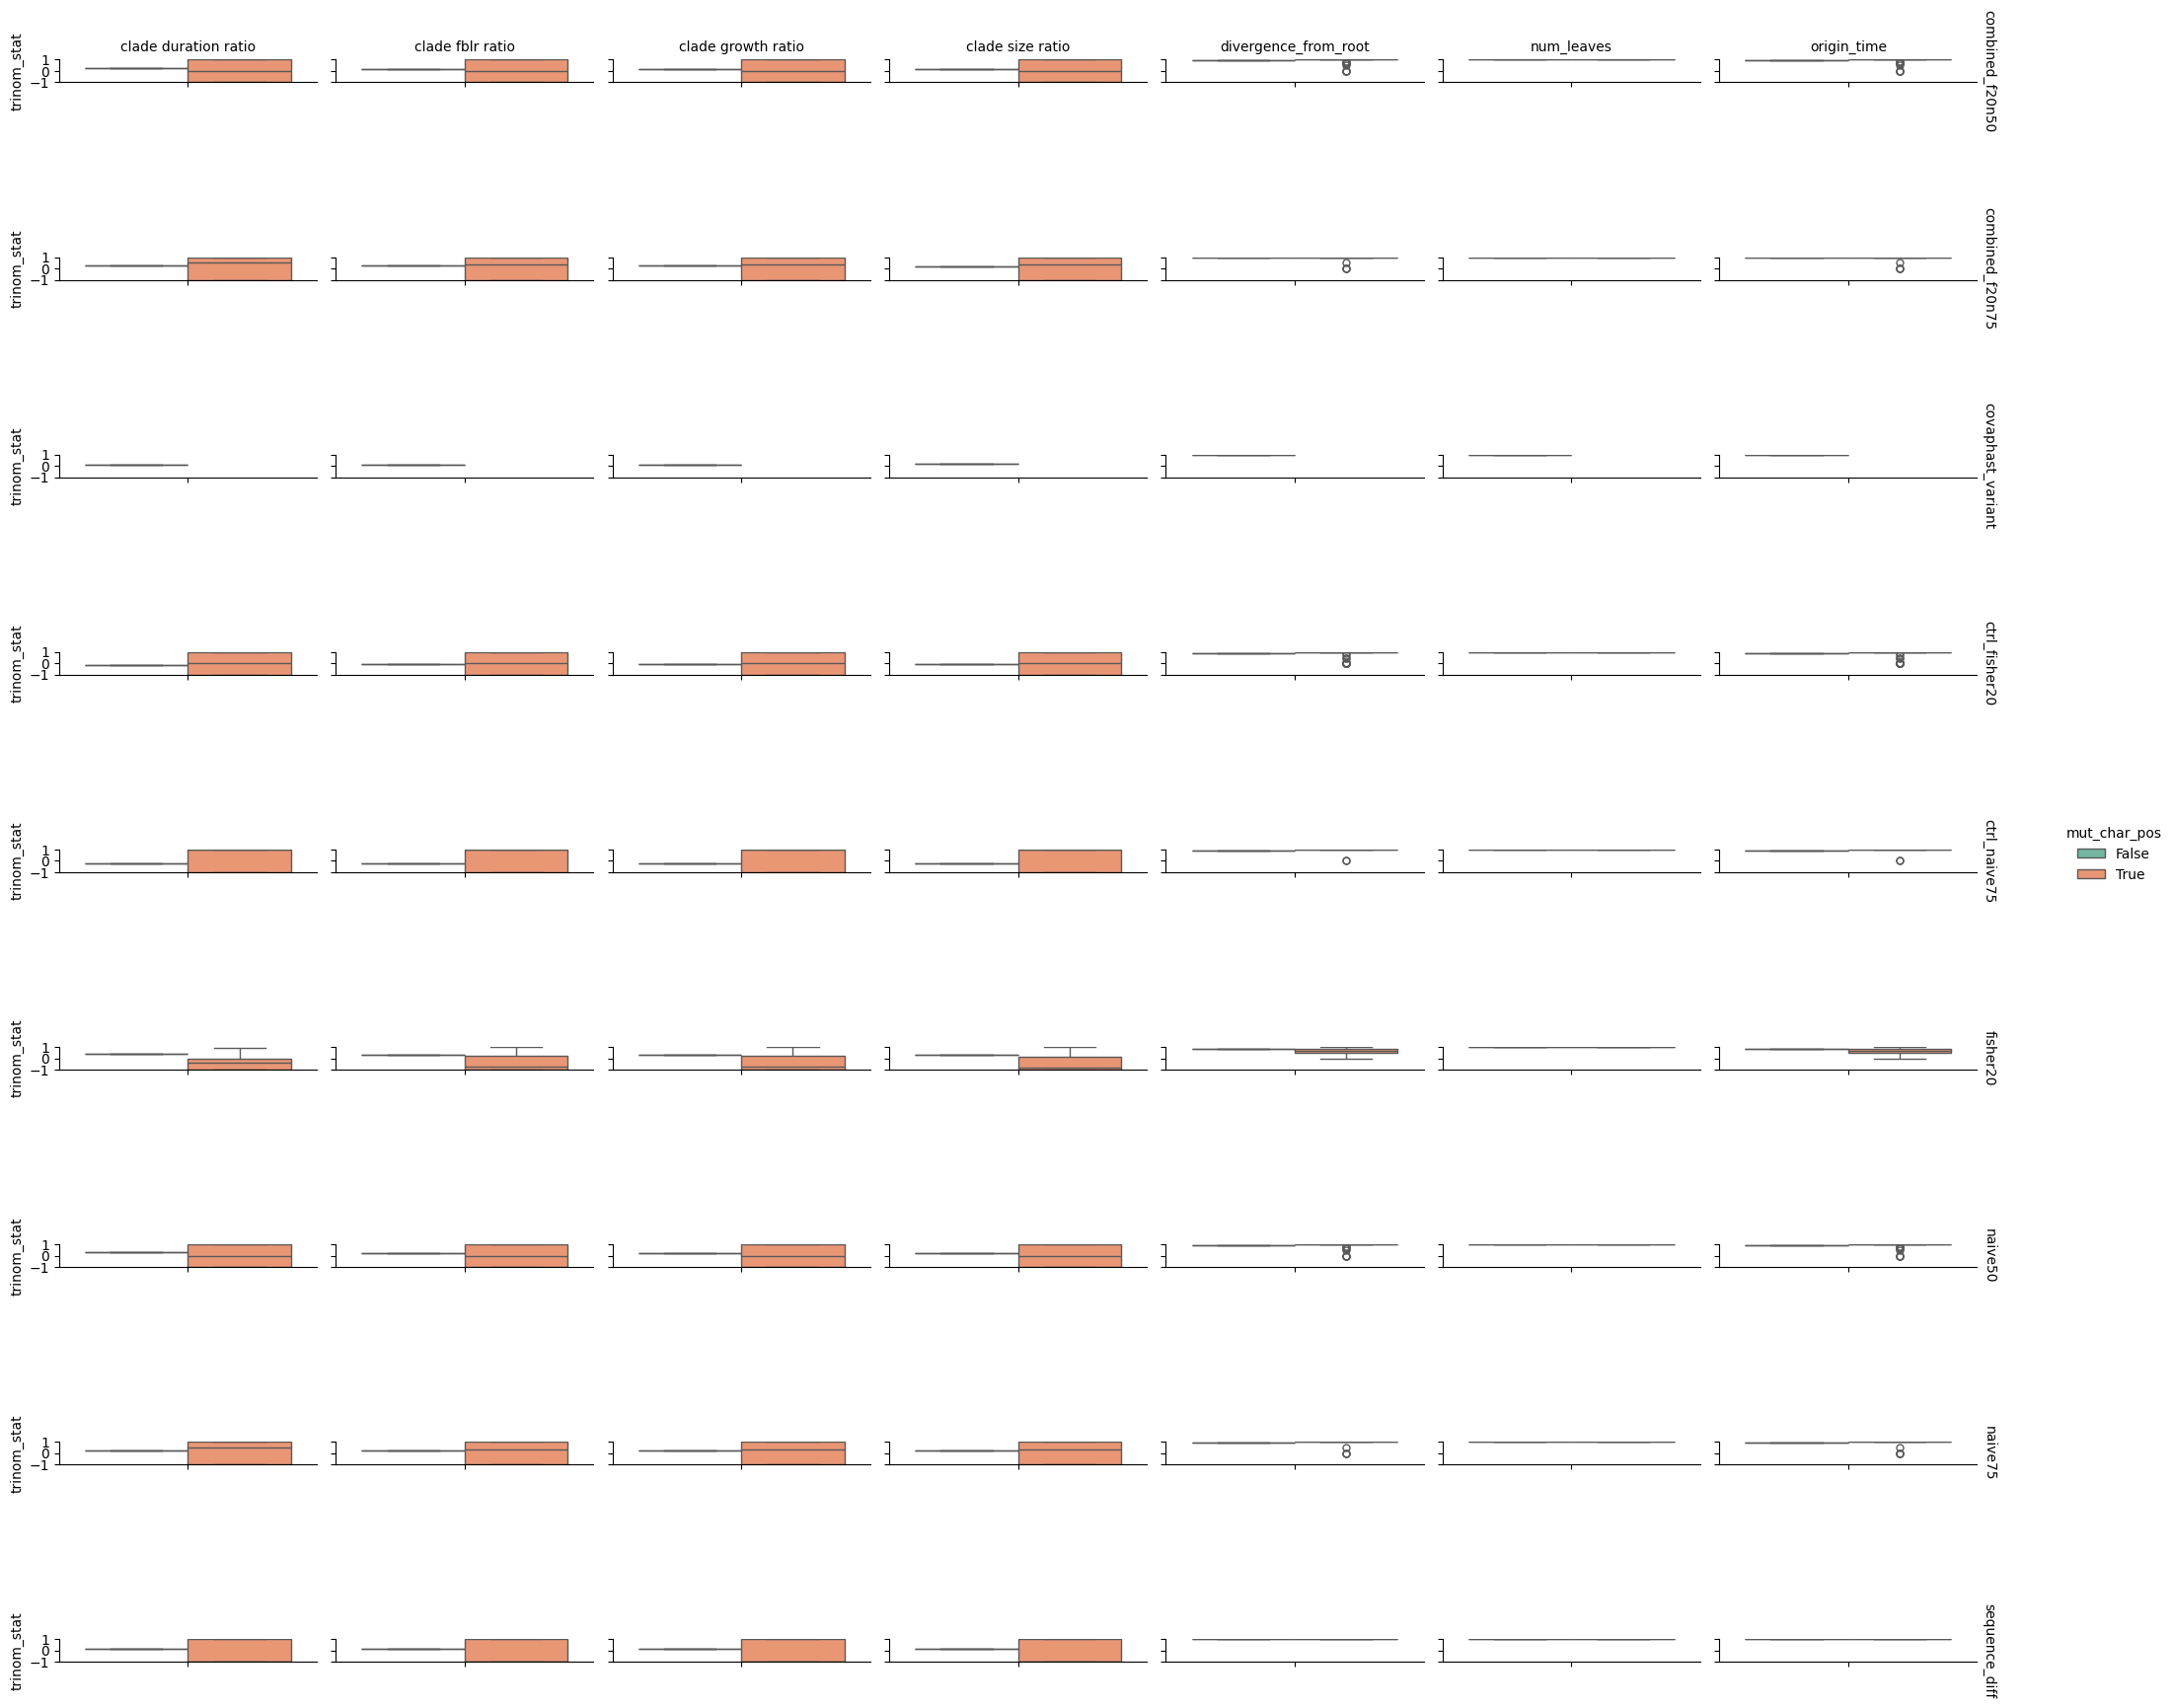

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


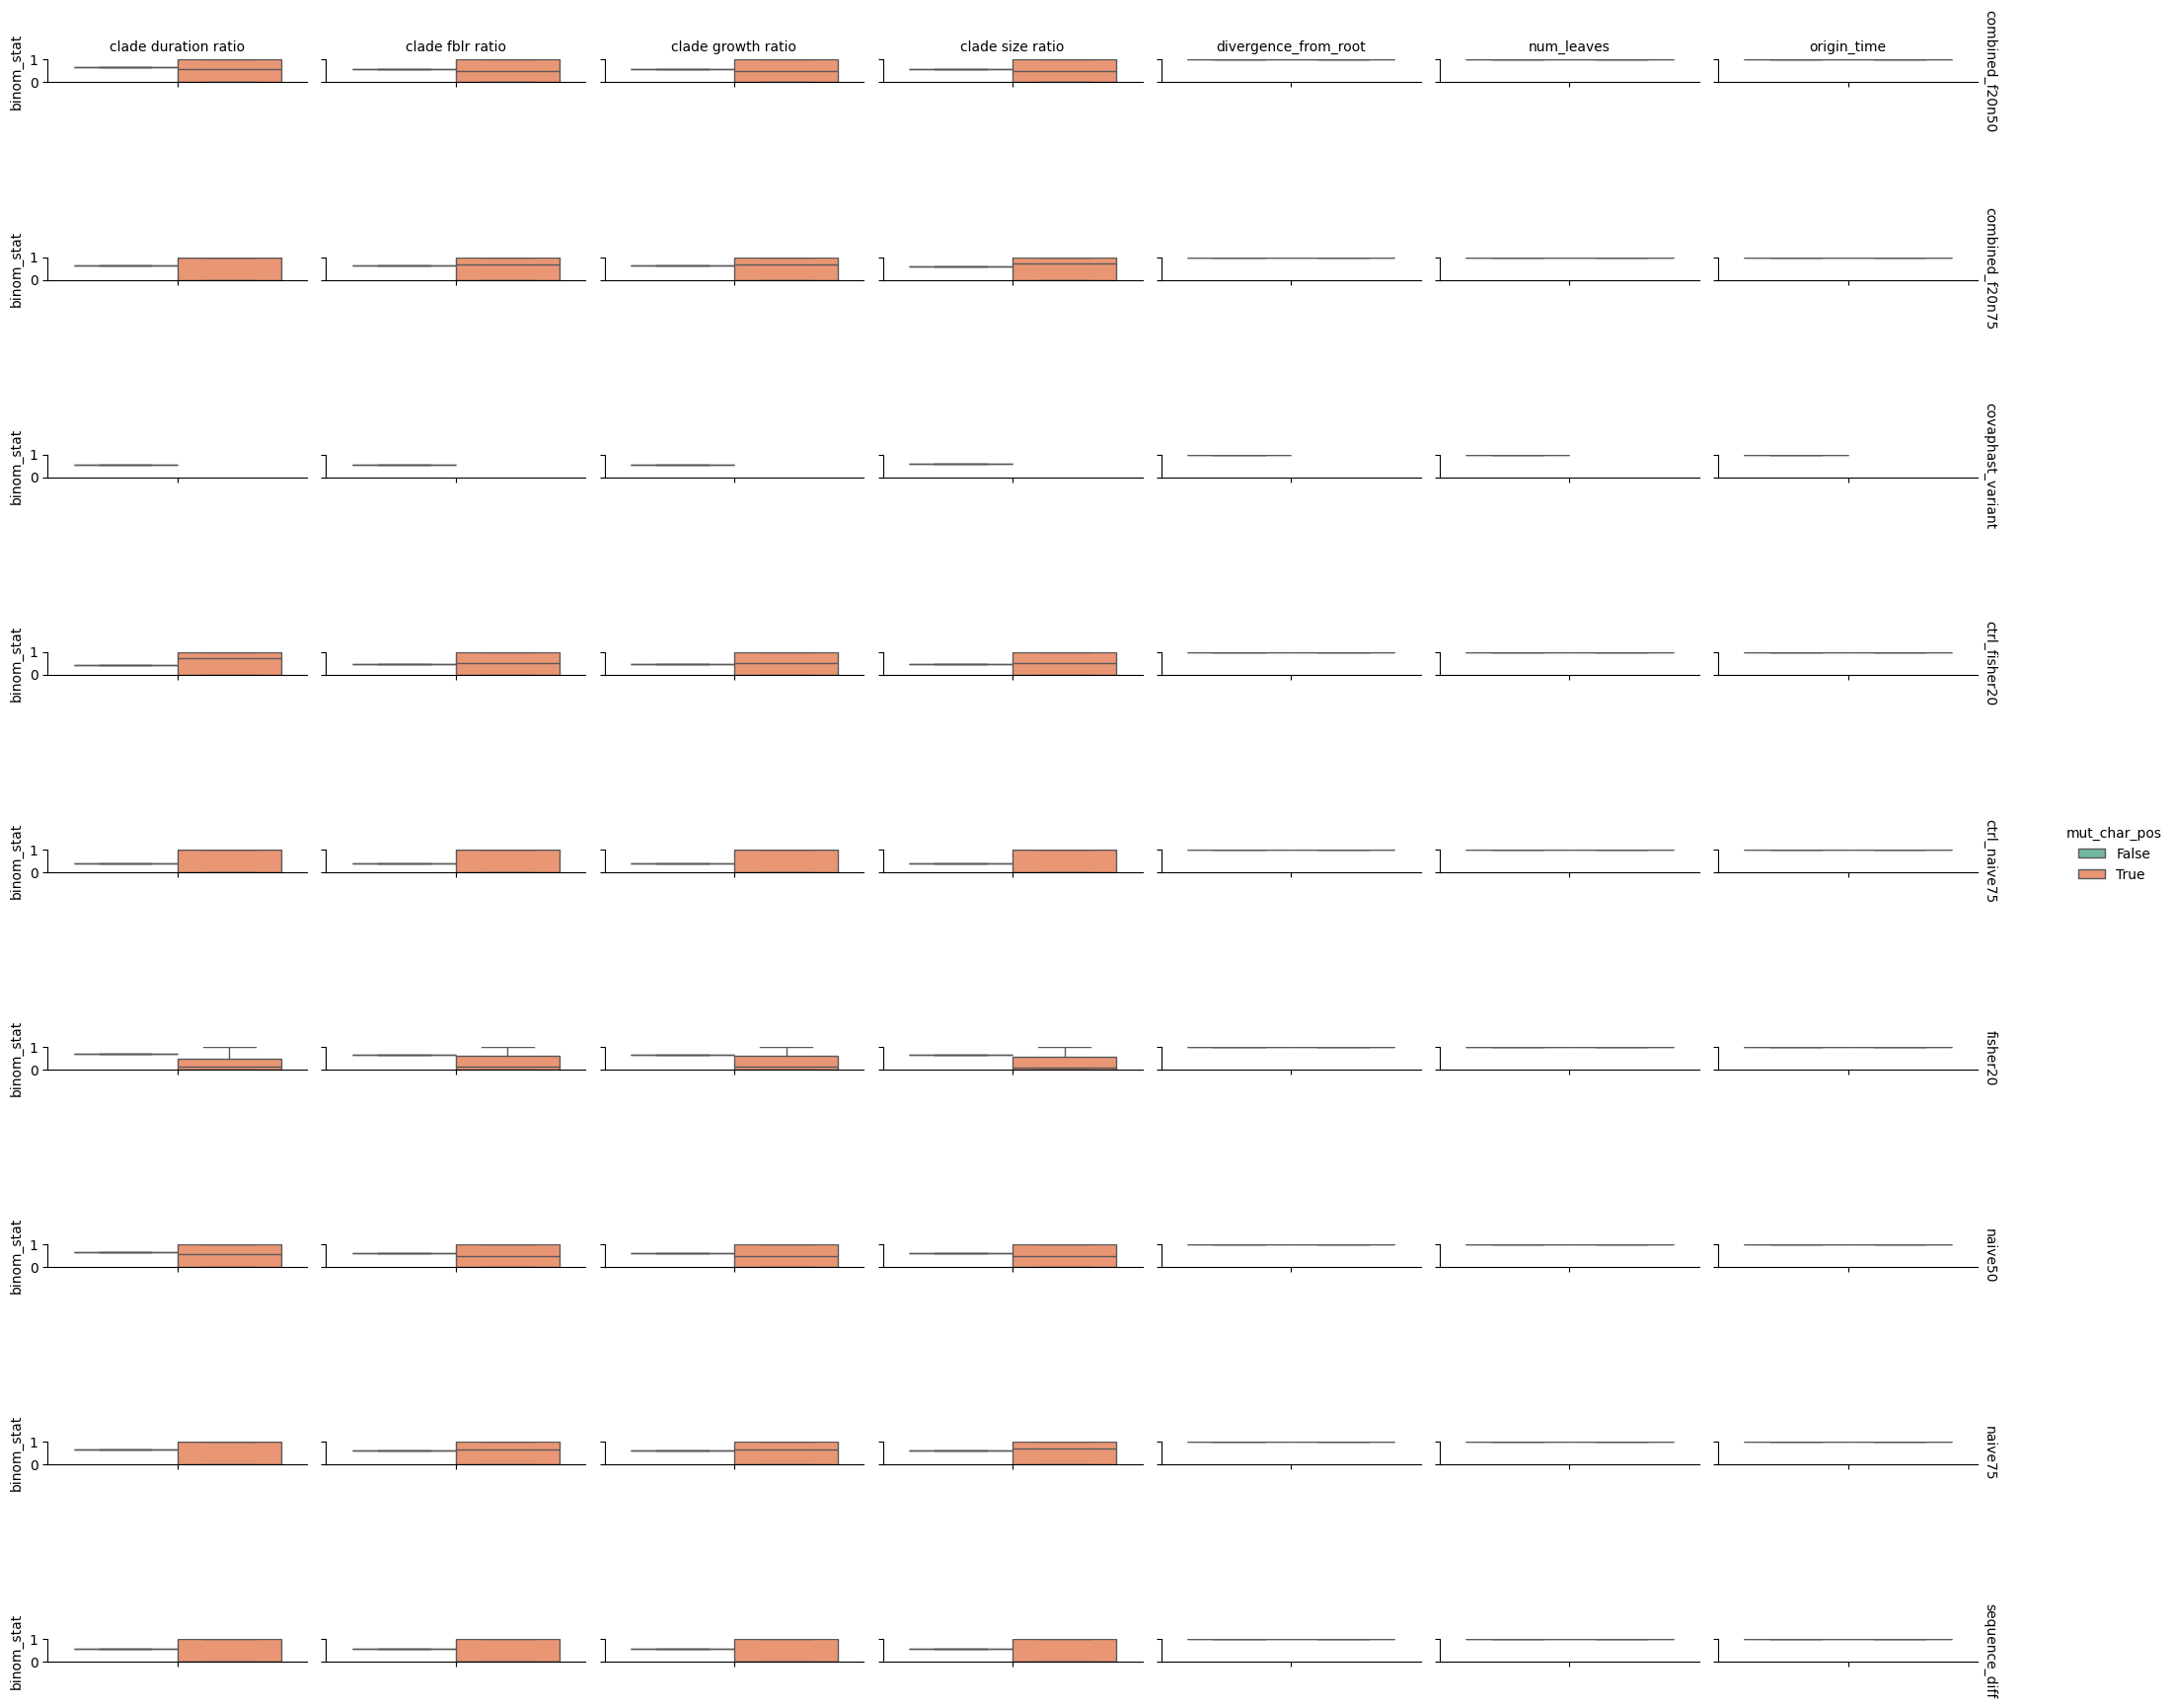

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


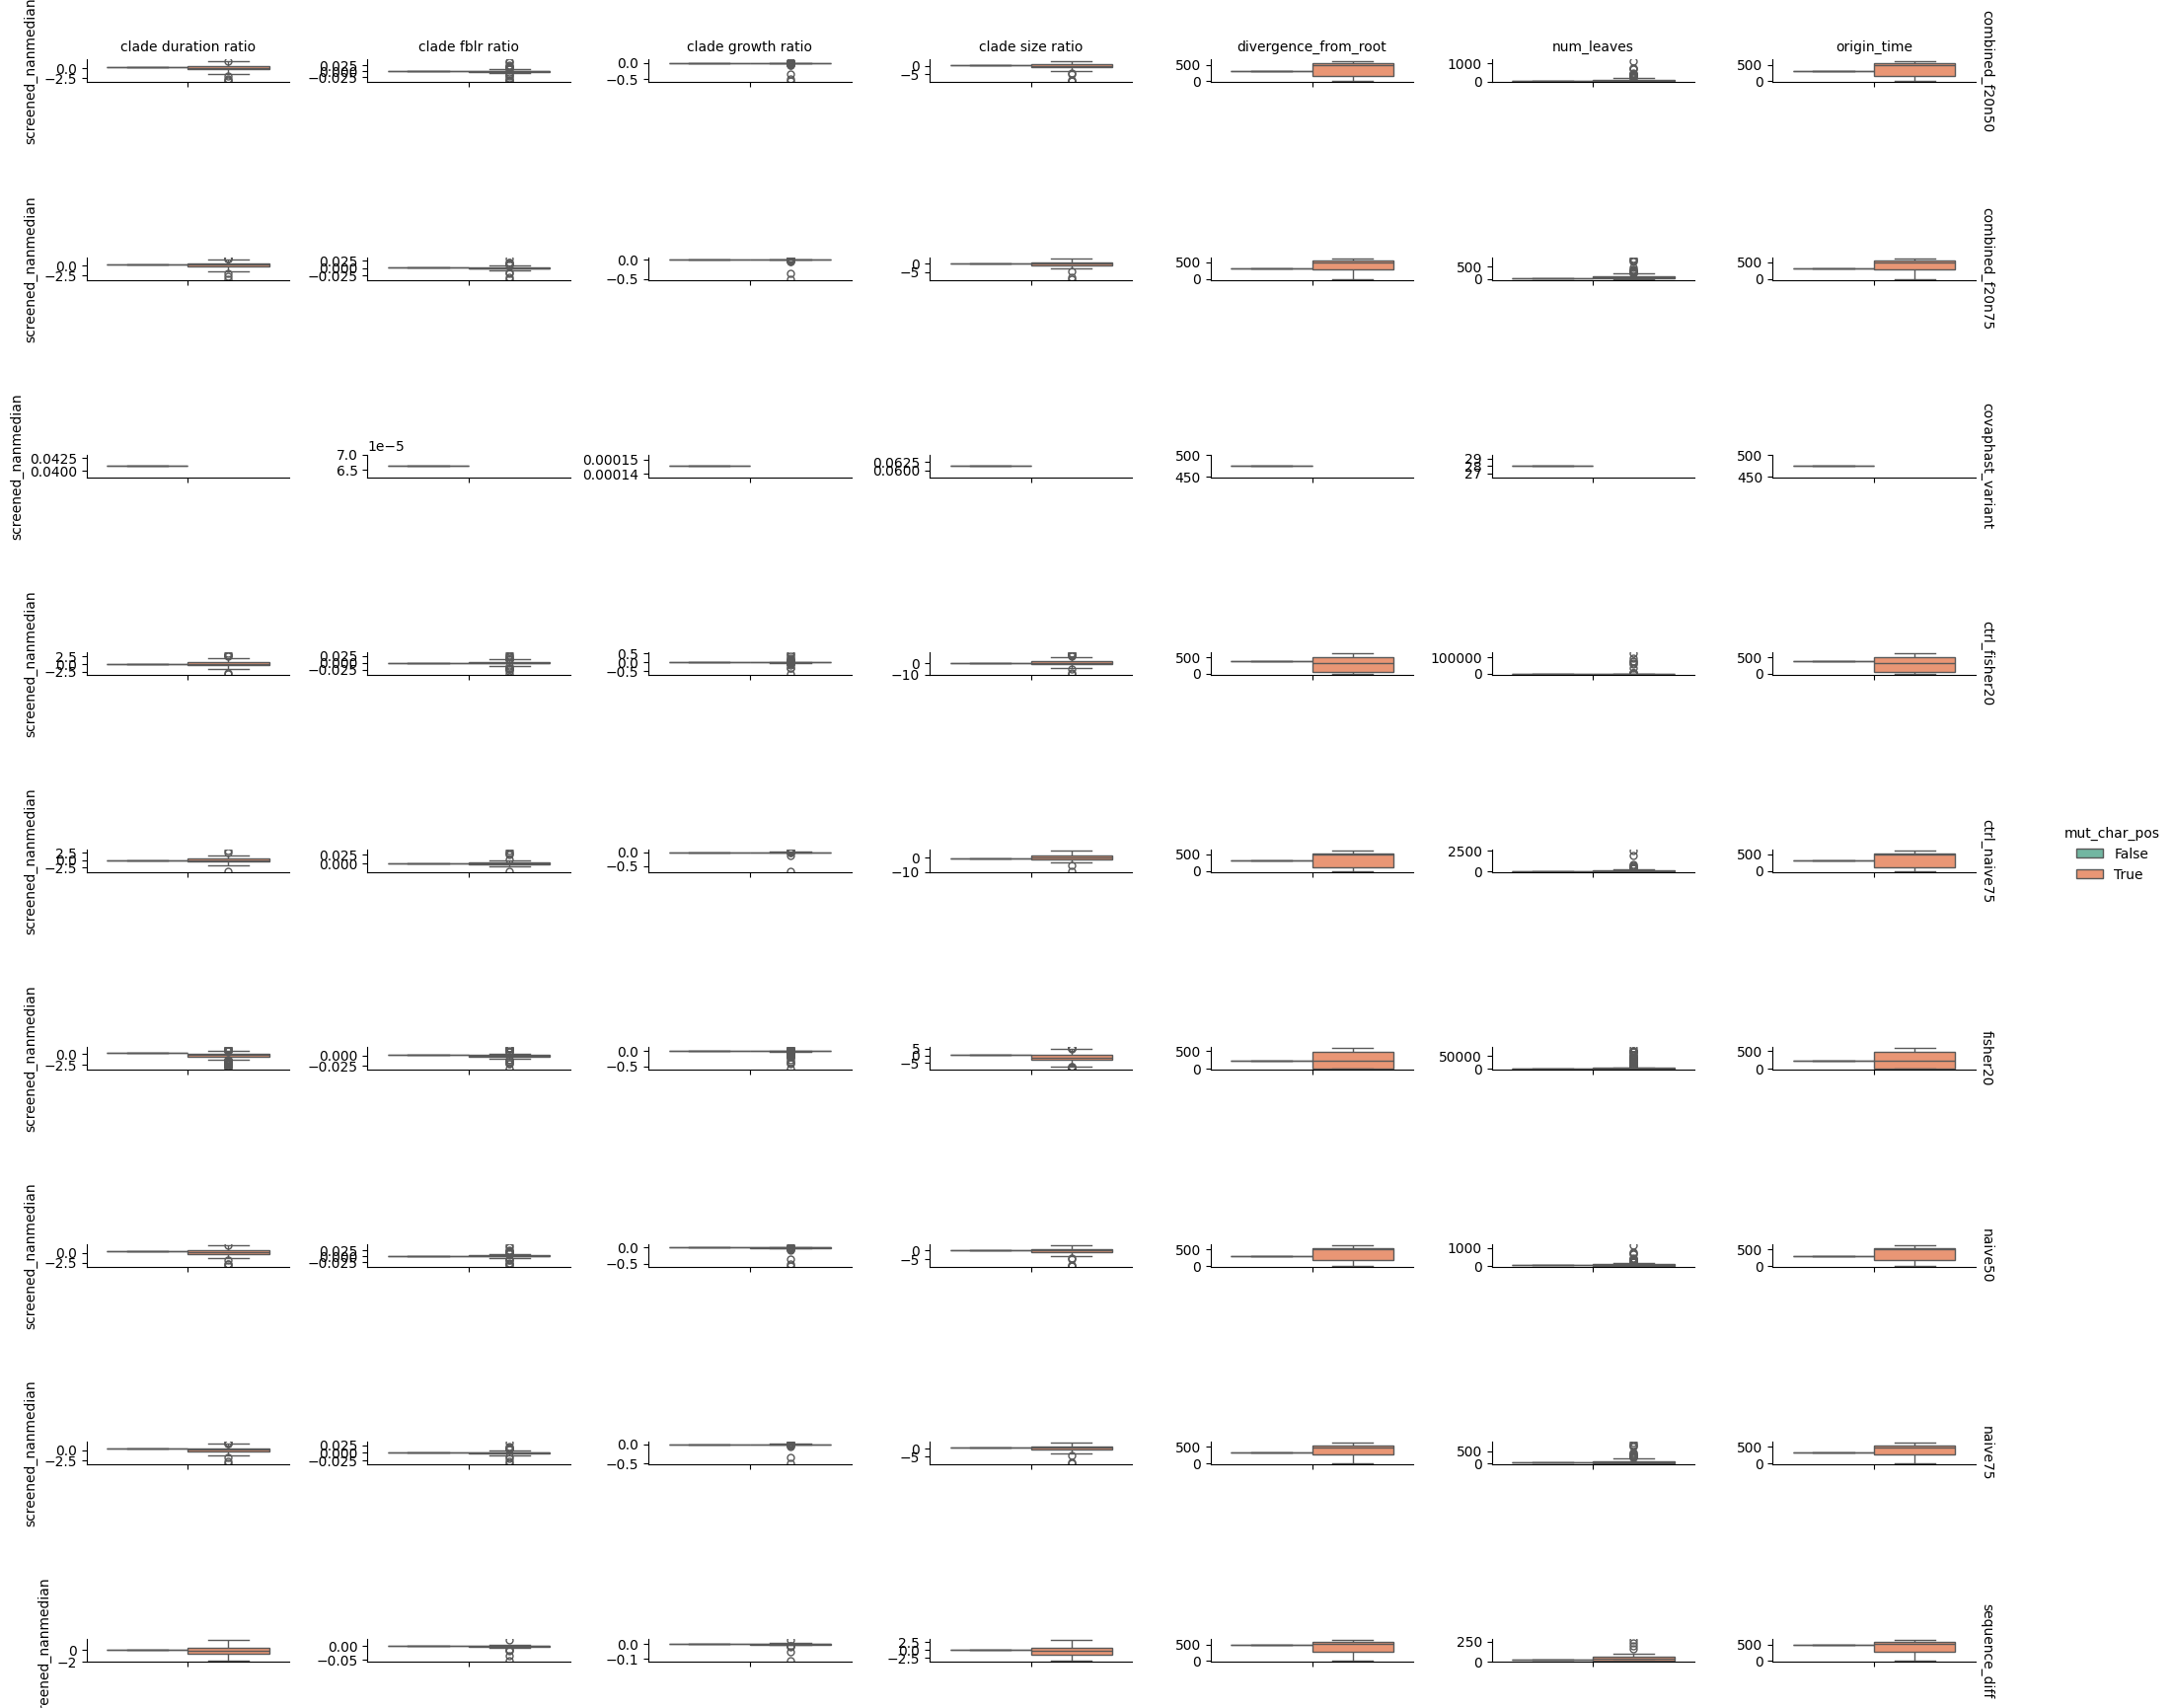

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


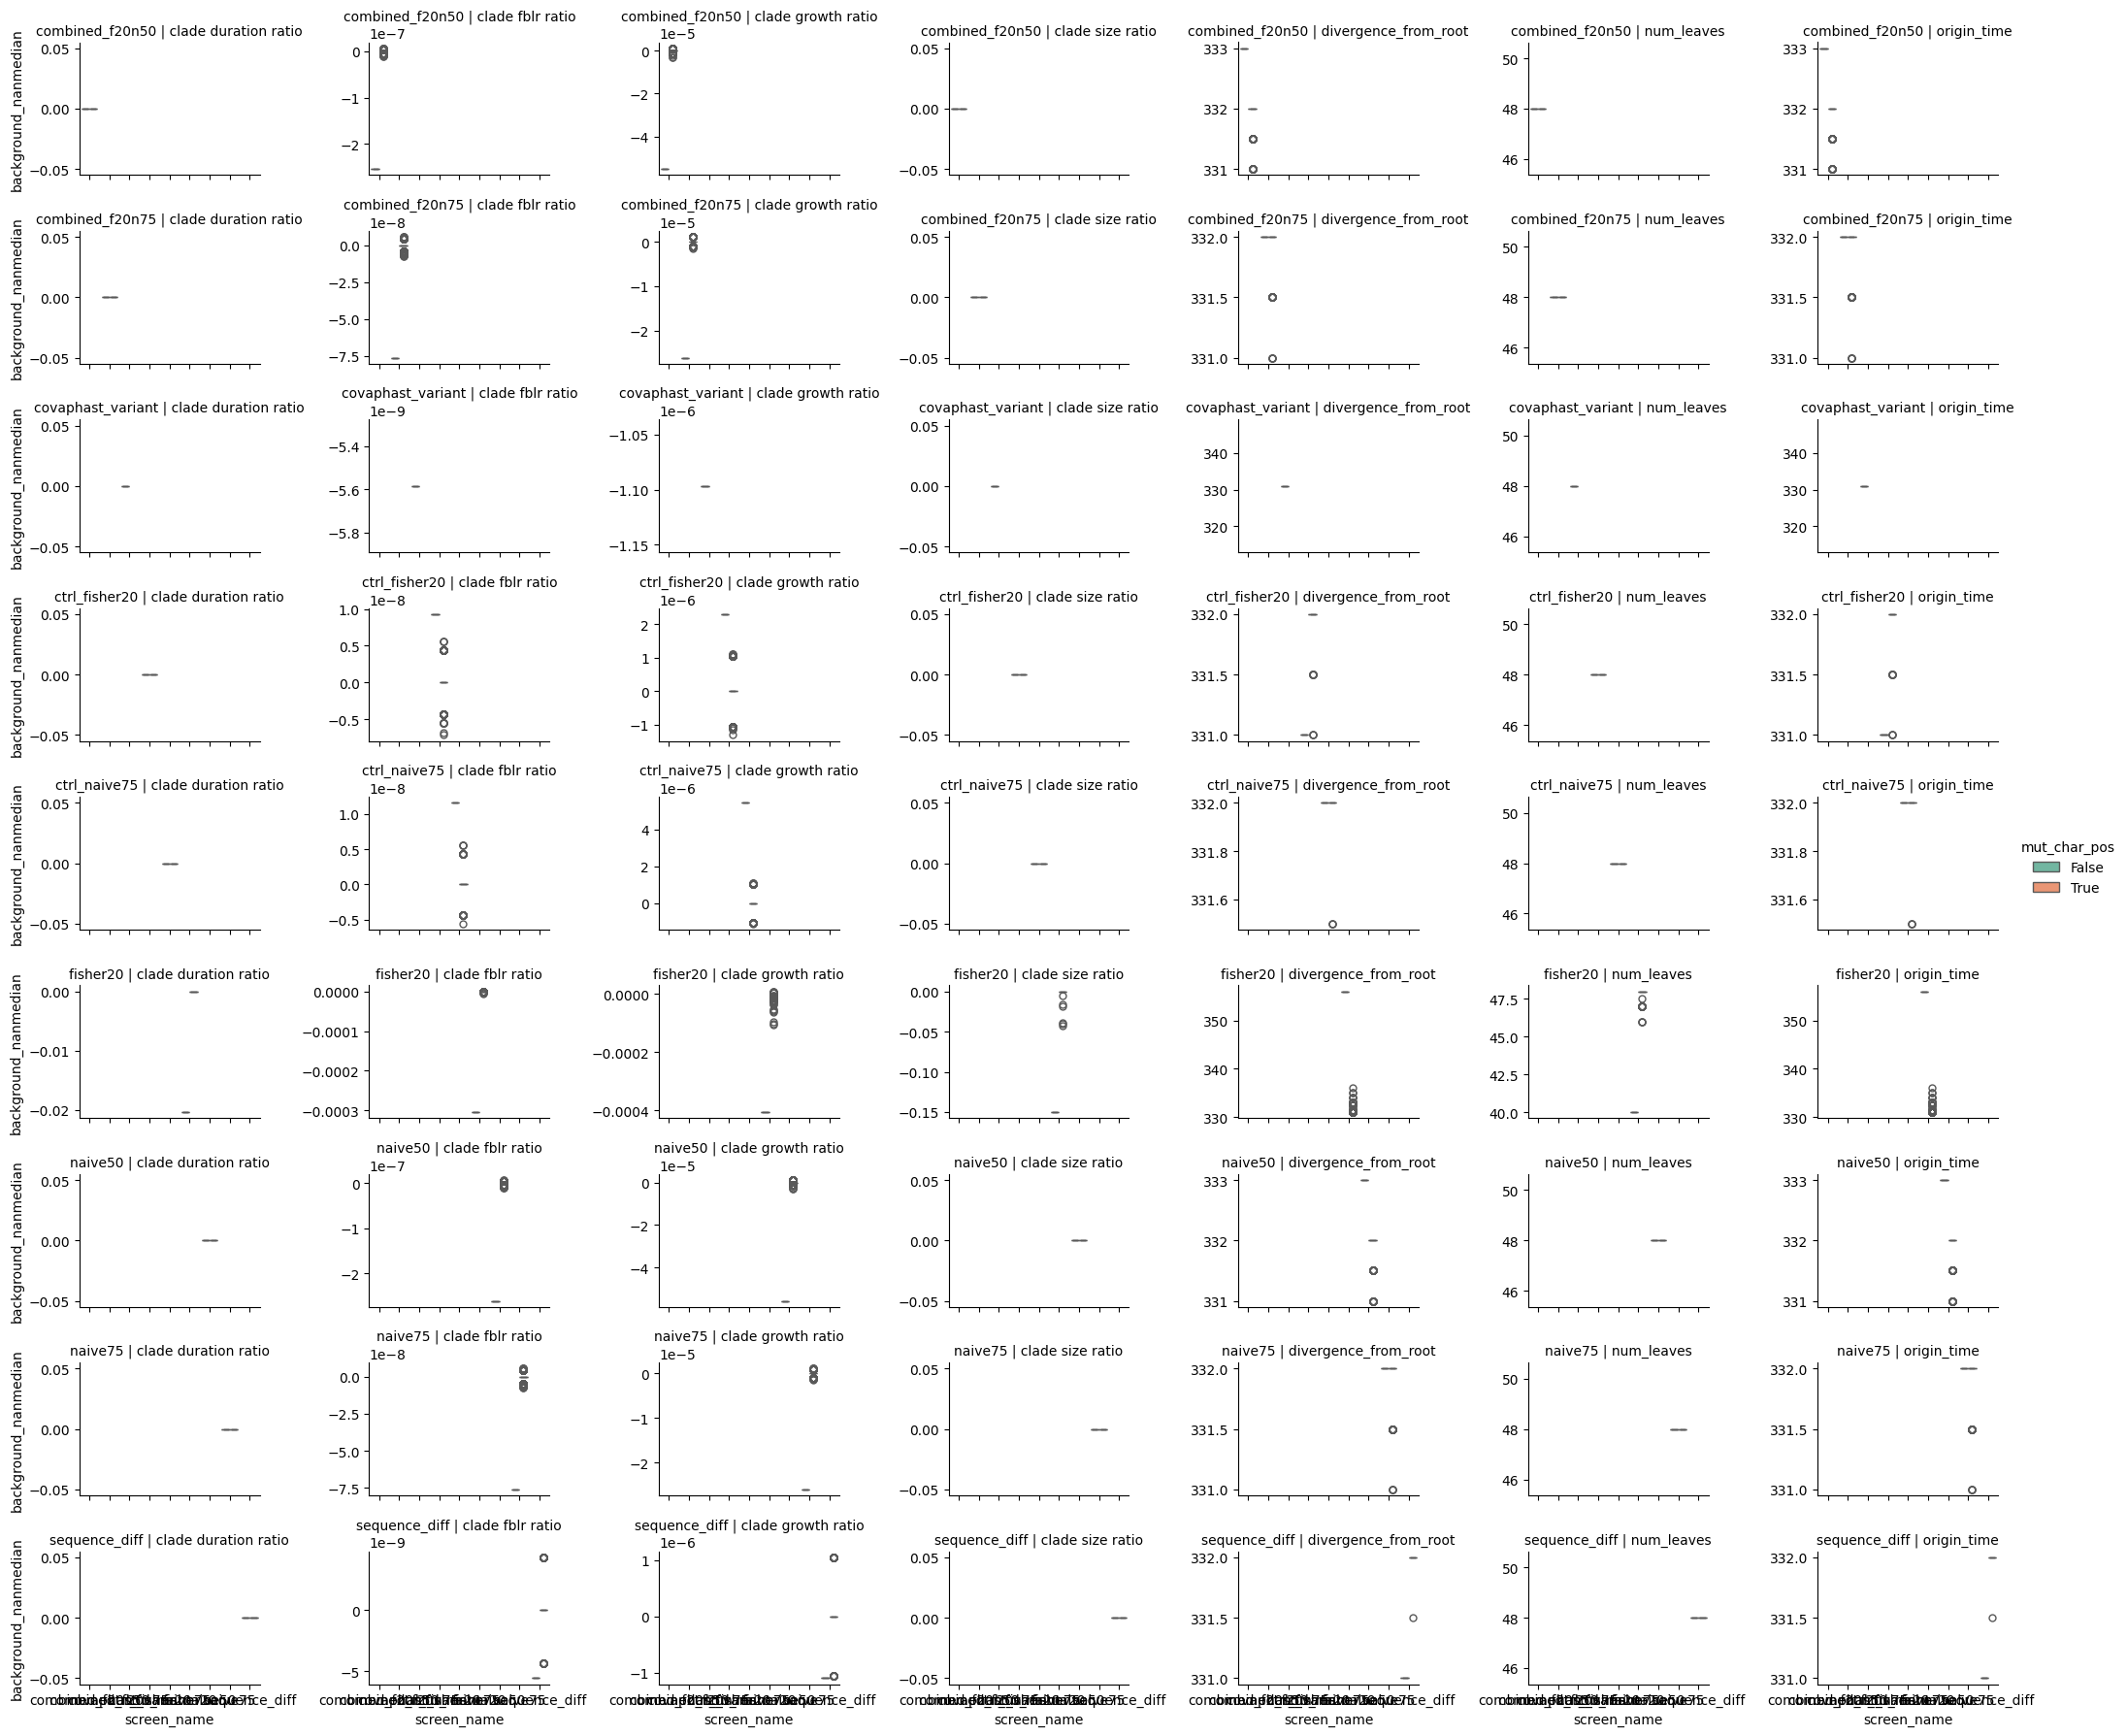

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
